In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data= "data/city_data.csv"
ride_data= "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview

city_data_df = pd.read_csv(city_data,encoding="iso-8859-1")
ride_data_df = pd.read_csv(ride_data,encoding="iso-8859-1")
merge_data_df = pd.merge(ride_data_df, city_data_df, how="left", left_on="city", right_on="city")

merge_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
urban_df = merge_data_df.loc[merge_data_df["type"] == "Urban"].groupby("city", as_index=False)
suburban_df = merge_data_df.loc[merge_data_df["type"] == "Suburban"].groupby("city", as_index=False)
rural_df = merge_data_df.loc[merge_data_df["type"] == "Rural"].groupby("city", as_index=False)



#averages based on city
avg1_fare_df = urban_df["fare"].mean()
avg2_fare_df = suburban_df["fare"].mean()
avg3_fare_df = rural_df["fare"].mean()


#ride count based on city
rides1_df = urban_df["ride_id"].count()
rides2_df = suburban_df["ride_id"].count()
rides3_df = rural_df["ride_id"].count()

#number of drivers based on city
driver1_count_df = urban_df ["driver_count"].mean()
driver2_count_df = suburban_df ["driver_count"].mean()
driver3_count_df = rural_df ["driver_count"].mean()


rural_df3=pd.merge(driver3_count_df,rides3_df,how="left",left_on="city",right_on="city")
rural_df_final=pd.merge(rural_df3,avg3_fare_df,how="left",left_on="city",right_on="city")

urban_df3=pd.merge(driver1_count_df,rides1_df,how="left",left_on="city",right_on="city")
urban_df_final=pd.merge(urban_df3,avg1_fare_df,how="left",left_on="city",right_on="city")

suburban_df3=pd.merge(driver2_count_df,rides2_df,how="left",left_on="city",right_on="city")
suburban_df_final=pd.merge(suburban_df3,avg2_fare_df,how="left",left_on="city",right_on="city")

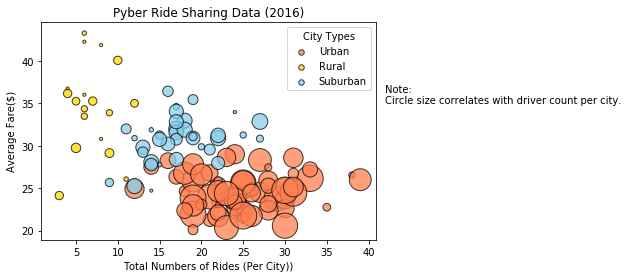

In [3]:
plt.scatter(urban_df_final.ride_id, urban_df_final.fare,s=urban_df_final.driver_count*10, marker="o", facecolor="Coral", edgecolors="black", alpha=0.75, label="Urban")
plt.scatter(rural_df_final.ride_id, rural_df_final.fare,s=rural_df_final.driver_count*10, marker="o", facecolor="Gold", edgecolors="black", alpha=0.75, label="Rural")
plt.scatter(suburban_df_final.ride_id, suburban_df_final.fare,s=suburban_df_final.driver_count*10, marker="o", facecolor="Skyblue", edgecolors="black", alpha=0.75, label="Suburban")
    


#Chart labels, Legend, & Title
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10, title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)
plt.savefig("Pyber Ride Sharing Data (2016).png") 
plt.show()


## Total Fares by City Type

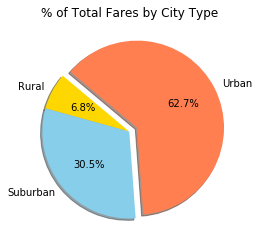

In [4]:
# Calculate Type Percents

totalfare = merge_data_df.groupby(["type"])["fare"].sum()
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
#sizes = [220, 95, 80, 100]
explode = (0, 0, 0.1)
plt.pie(totalfare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")                                                                                                                     
plt.savefig("% of Total Fares by City Type.png")
  
    
plt.show()

## Total Rides by City Type

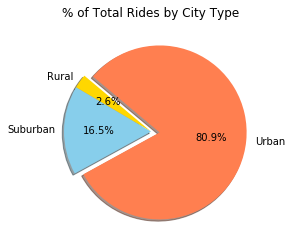

In [5]:
totalfare = city_data_df.groupby(["type"])['driver_count'].sum()

                                        
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
sizes = [220, 95, 80, 100]
explode = (0, 0, 0.1)
plt.pie(totalfare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")                                                                                                                     
plt.savefig("% of Total Rides by City Type.png") 

plt.show()

## Total Drivers by City Type 

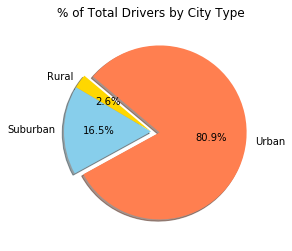

In [6]:
totalfare = city_data_df.groupby(["type"])['driver_count'].sum()

                                        
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
sizes = [220, 95, 80, 100]
explode = (0, 0, 0.1)
plt.pie(totalfare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")                                                                                                                     
plt.savefig("% of Total Drivers by City Type.png") 

plt.show()

## Three Trends


    1.Urban has the most fares, drivres, and rides
    2.Suburbia has the next most share of fares, drivers, and rides. It is folowed by the country
    3.This would be expected based on the population of these areas.